# Diabetes 130-US hospitals for years 1999-2008 Data Set

**Abstract:** This case has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

**Each phase of the process:**
1. [Business understanding](#Businessunderstanding)
    1. [Assess the Current Situation](#Assessthecurrentsituation)
        1. [Inventory of resources](#Inventory)
        2. [Requirements, assumptions and constraints](#Requirements)
        3. [Risks and contingencies](#Risks)
        4. [Terminology](#Terminology)
        5. [Costs and benefits](#CostBenefit)
    2. [What are the Desired Outputs](#Desiredoutputs)
    3. [What Questions Are We Trying to Answer?](#QA)
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers) 
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Cleanse the Data](#Cleansethedata)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
    1. [Modelling Technique](#ModellingTechnique)
    2. [Modelling Assumptions](#ModellingAssumptions)
    3. [Build Model](#BuildModel)
    4. [Assess Model](#AssessModel)
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>

## 1.1 Assess the Current Situation<a class="anchor" id="Assessthecurrentsituation"></a>

There are not insights about the diabetes patients hospital readmissions. 

### 1.1.1. Inventory of resources <a class="anchor" id="Inventory"></a>
List the resources available to the project including:
- Personnel: 1 "full stack" DS Coordinator
- Data: Diabetes 130-US hospitals for years 1999-2008 https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#
- Computing resources: Intel i7 8-core @ 2.8Ghz, GPU GTX 1060 6GB GDDR5, Ram 16gb. 
- Software: Linux, Python 3.7, Visual Studio, Notebook Jupyter


### 1.1.2. Requirements, assumptions and constraints - <a class="anchor" id="Requirements"></a> 
Predict three categories of readmission pacients:
* Less than 30: if the patient was readmitted in less than 30 days  
* More than 30: if the patient was readmitted in more than 30 days  
* No record: for no record of readmission  

To the MVP we simplify the target to:  
* 1: if the patient was readmitted in less than 30 and more than 30  
* 0: for no record of readmission  

### 1.1.3.Risks and contingencies <a class="anchor" id="Risks"></a>
- Changes in current pacients behaviours in constrast to given dataset  
I suggest to update the data. As this a very high impact prediction for life quality of the pacients, we should not experiment with pacient in online prediction with the model train with more than 10 years old dataset. The cost of false negative could be very high. TODO: CHECK

### 1.1.4.Terminology <a class="anchor" id="Terminology"></a>
- No apply by the moment

### 1.1.5.Costs and benefits  <a class="anchor" id="CostBenefit"></a>
- It has been doing by PM team.

 ## 1.2 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Reduce cost of diabetes readmissions by 10% during the next 12 month after prediction get online after pacient trial phase. 

**Data mining success criteria**
- F-score above 90%
- Get the MVP in one day


**Produce project plan**
- https://github.com/wiflore/Diabetes-ML-Case/projects/1


 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- How could we know which pacient will comeback in the next 30 days due to a potental bad diabetes treatment?

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import gc
from src.utilities import helpers
import os
import pathlib


In [2]:
BASE_PATH = os.path.dirname(os.path.abspath("")) + os.sep  #change "" to __file__ in .py

In [3]:
#Data source: 
#Source Query location: 
path =  BASE_PATH + 'data/raw/diabetic_data.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(path, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>

In [4]:
df.shape

(101766, 50)

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

It is supicious that there are not missing value. 

In [10]:
for col in df.select_dtypes(include = ['object']):
    unique = df[col].unique()
    if len(unique) == 1:
        print(f"\t<<<< one value column >>>>")
    print(f">>{col}: len: {len(unique)} list: {unique} \n")

>>race: len: 6 list: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

>>gender: len: 3 list: ['Female' 'Male' 'Unknown/Invalid'] 

>>age: len: 10 list: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

>>weight: len: 10 list: ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

>>payer_code: len: 18 list: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

>>medical_specialty: len: 73 list: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-Critic

>>readmitted: len: 3 list: ['NO' '>30' '<30'] 



In [11]:
df.replace('?',np.nan,inplace=True)

"?" is the missing code. medical_speciality and diag_n variables has a lot of codes. Also, examide and citoglipton has just one value. 

0               weight
1    medical_specialty
Name: Feature, dtype: object

<Figure size 432x288 with 0 Axes>

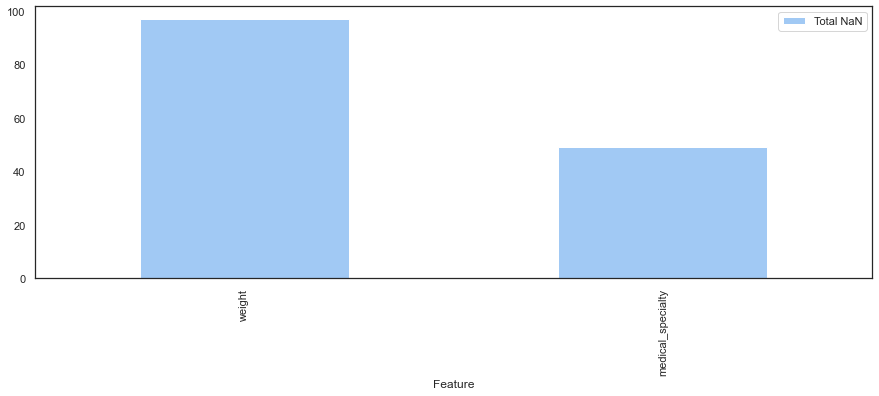

In [12]:
missing_thresold = 40
missings = helpers.missing_data(df, missing_thresold)

### Missing rows

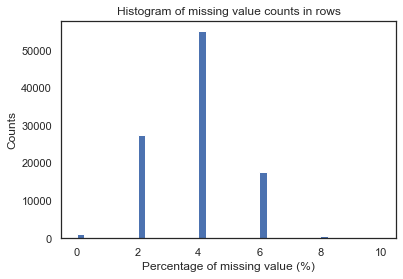

,count,weight,cumsum
"[0, 1)",1043,0.010249,0.010249
"[1, 2)",0,0.000000,0.010249
"[2, 3)",27449,0.269727,0.279976
"[3, 4)",0,0.000000,0.279976
"[4, 5)",55042,0.540868,0.820844
"[5, 6)",0,0.000000,0.820844
"[6, 7)",17640,0.173339,0.994183
"[7, 8)",0,0.000000,0.994183
"[8, 10)",564,0.005542,0.999725
"[10, 15)",28,0.000275,1.000000


In [13]:
missings = (
    df.isnull().sum(axis=1) / len(df.columns) * 100).sort_values(
        ascending=False)
plt.hist(missings[missings >= 0], bins=40)
plt.xlabel('Percentage of missing value (%)')
plt.ylabel('Counts')
plt.title('Histogram of missing value counts in rows')
plt.show()
#
bins = pd.cut(
    missings, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 30, 50, 80], right=False)
agg = pd.DataFrame(
    missings, columns=['missings']).groupby(bins)['missings'].agg(['count'])
agg['weight'] = agg['count'] / len(missings)
agg['cumsum'] = agg['weight'].cumsum()
agg

Distribution

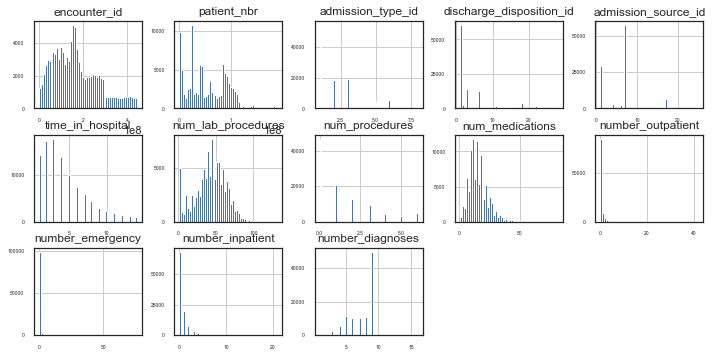

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(12, 35), bins=50, xlabelsize=5, ylabelsize=5, layout=(17,5)); # ; avoid havi

In [15]:
df_num.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [16]:
len(df.encounter_id.unique())/len(df)

1.0



### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>

<AxesSubplot:>

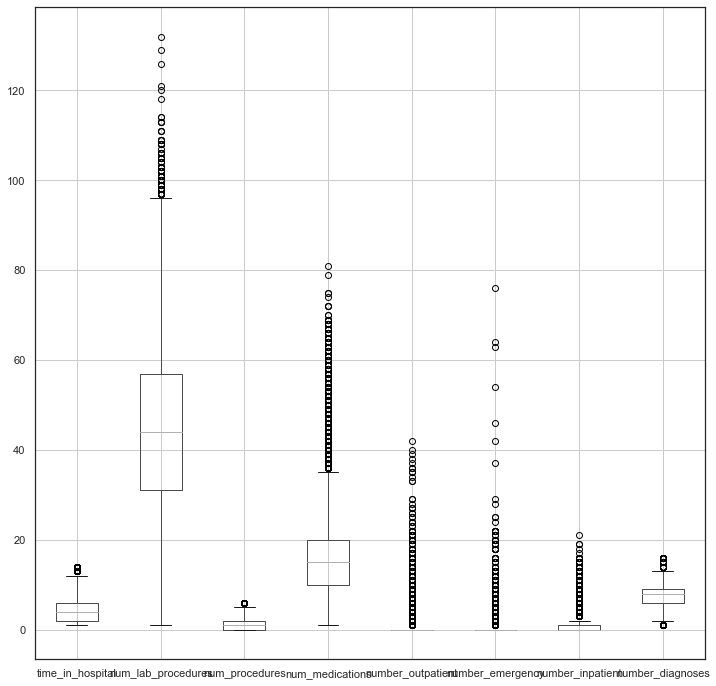

In [17]:
num_cols =['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses']
df.boxplot(column=num_cols, figsize=(12, 12))

In [18]:
# get outliers
def get_outliers(df, columns, left = 1.5, right = 1.5):
    """
    Outliers of columns
    INPUT: df - DataFrame to Process
           col - Col to process
    OUTPUT:
           outliers
    """
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[columns] < (Q1 - left * IQR)) |
                               (df[columns] > (Q3 + right * IQR)))]
    return outliers[columns]

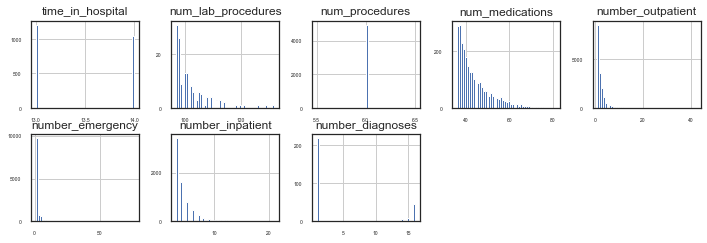

In [19]:

df_out = get_outliers(df, num_cols)
df_out.hist(figsize=(12, 35), bins=50, xlabelsize=5, ylabelsize=5, layout=(17,5)); # ; avoid havi

In [20]:
1-df_out.isnull().sum()/len(df)

time_in_hospital      0.022129
num_lab_procedures    0.001405
num_procedures        0.048680
num_medications       0.025126
number_outpatient     0.164485
number_emergency      0.111855
number_inpatient      0.069267
number_diagnoses      0.002761
dtype: float64

In [21]:
del df_num
gc.collect()

188650

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>

In [22]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

# 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Sometimes we may need to alter data types. Including to/from object datatypes

In [23]:
columns_num_to_obj = ['admission_type_id','discharge_disposition_id', 'admission_source_id' ]
df[columns_num_to_obj] = df[columns_num_to_obj].astype('O')

In [24]:
df_dtypes = df.dtypes.to_frame('dtypes')
df_dtypes = df_dtypes.astype(str)
df.to_parquet(BASE_PATH + 'data/modeled/df_modeled.parquet.gzip', compression='gzip') 
df_dtypes.to_parquet(BASE_PATH + 'data/modeled/df_modeled_dtypes.parquet.gzip', compression='gzip') 

### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>

In [128]:
df=pd.read_parquet(BASE_PATH + 'data/modeled/df_modeled.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/modeled/df_modeled_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

0               weight
1    medical_specialty
Name: Feature, dtype: object

0               weight
1    medical_specialty
Name: Feature, dtype: object

<Figure size 432x288 with 0 Axes>

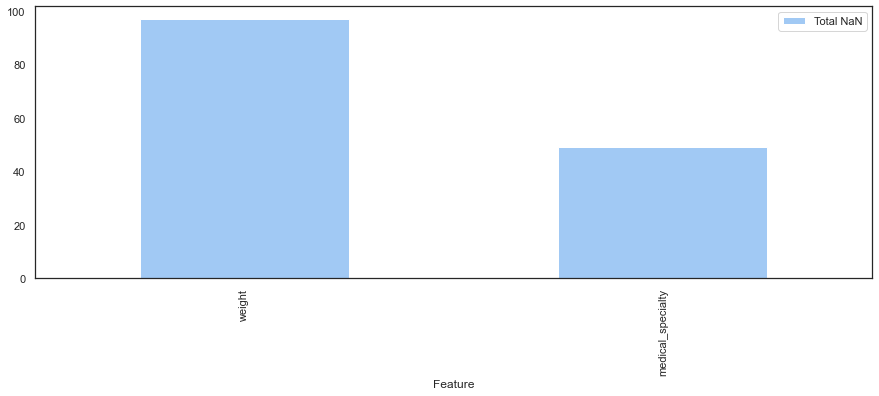

In [129]:
missing_thresold = 40
missings = helpers.missing_data(df, missing_thresold);
helpers.drop_missings(df, missings, missing_thresold)

In [130]:
df.drop(["encounter_id", "patient_nbr", "examide", "citoglipton"], axis=1, inplace=True)

In [131]:
df.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [132]:
print("Percentage of data if drop all NaN {0:.2f}%".format(
    100 - len(df.dropna()) / len(df) * 100))

Percentage of data if drop all NaN 41.90%


### 3.2.4 Dealing With NaNs <a class="anchor" id="DealingZeros"></a>

In [133]:
def removing_outliers(df, columns):
    """
    Remove outliers of columns
    INPUT: df - DataFrame to Process
           col - Col to process
    OUTPUT:
            df proceseed
    """
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_without_outliers = df[~((df[columns] < (Q1 - 1.5 * IQR)) |
                               (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_without_outliers

outliers_col = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']
df = removing_outliers(df, outliers_col)

In [134]:
#Inputing NaN value with a NaN numerical code as models uses numbers for both numerical and categorical features
df.fillna('-100', inplace = True, downcast=True) 

In [136]:
print("Percentage of data if drop all NaN {0:.2f}%".format(
    100 - len(df.dropna()) / len(df) * 100))

Percentage of data if drop all NaN 0.00%


In [138]:
df_dtypes = df.dtypes.to_frame('dtypes')
df_dtypes = df_dtypes.astype(str)
df.to_parquet(BASE_PATH + 'data/transformed/df_transformed.parquet.gzip', compression='gzip') 
df_dtypes.to_parquet(BASE_PATH + 'data/transformed/df_transformed_dtypes.parquet.gzip', compression='gzip') 

## Features Engineering

### 3.2.1 New features

I will focus on features: medical specialty and diag_n as both has a high number of categories. However, due to high level of NaN of medical specialty it was removed. So I will focus to diag_n

I will start with a simple approach, just combine the diags and pickups the more relevants. Also I could group by them by category but for time restriction I go ahead for a faster approach

In [139]:
df=pd.read_parquet(BASE_PATH + 'data/transformed/df_transformed.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/transformed/df_transformed_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

In [140]:
diag_conbine = (df['diag_1'].value_counts() + df['diag_1'].value_counts() + df['diag_1'].value_counts()).sort_values(ascending=False)/len(df)
diag_conbine.head(40).to_frame('% code vs diags')

,% code vs diags
428,0.206543
414,0.176829
786,0.123994
486,0.105670
410,0.099542
427,0.084035
491,0.068497
715,0.064380
780,0.062028
434,0.061564


Below top 40 the code diag start to apper just below 1% of total counts. So it appers to be a good threasold. It is huge better than near 800 categories that it has before

In [141]:
thresold_top_diags = 40
codes = diag_conbine.head(thresold_top_diags).to_frame('% code vs diags').index.to_list()
for code in codes:
    df['diag_'+ str(code)] = (df['diag_1'] == code)|(df['diag_2'] == code)|(df['diag_3'] == code)

In [142]:
df.drop(["diag_1", "diag_2", "diag_3"], axis=1, inplace=True)

In [143]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_428', 'diag_414', 'diag_786', 'diag_486', 'diag_410', 'diag_427',
       'diag_491', 'diag_715', 'diag_780', 'diag_434', 'diag_682', 'diag_276',
       'diag_996', 'diag_250.8', 'diag_599', 'diag_38', 'diag_584'

### dummies creation

In [152]:
df = pd.get_dummies(df, columns=df.select_dtypes(include = ['object']).columns)
df.filter(regex='discharge_').sample(10)

,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,...,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28
53885,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75869,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
91595,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7215,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24820,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80162,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39683,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47594,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19048,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### target creation

In [157]:
df["target"] = 1 - df['readmitted_NO']

In [158]:
df.drop(['readmitted_<30','readmitted_>30', 'readmitted_NO'], axis=1, inplace=True)

### Saving data

In [162]:
df_dtypes = df.dtypes.to_frame('dtypes')
df_dtypes = df_dtypes.astype(str)
df.to_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered.parquet.gzip', compression='gzip') 
df_dtypes.to_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered_dtypes.parquet.gzip', compression='gzip') 

## 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>

In [163]:
df=pd.read_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered.parquet.gzip')
dtypes=pd.read_parquet(BASE_PATH + 'data/feature-engineered/df_feature-engineered_dtypes.parquet.gzip')
df = df.astype(dtypes.to_dict()['dtypes'])

# 5. Stage Four - Modelling <a class="anchor" id="Modelling"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.



## 5.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>
Document the actual modelling technique that is to be used.

Import Models below:

## 5.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>

## 5.3. Build Model <a class="anchor" id="BuildModel"></a>


## 5.4. Assess Model <a class="anchor" id="AssessModel"></a>
